# Define the frequency modulated (FM) sinusoid signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using Plots
using FFTW

## Define the frequency modulated (FM) sinusoid signal.

In [2]:
"""
Generates a frequency modulated (FM) sinusoid S. 
t is the time, snr is the matched filtering signal-to-noise ratio of S,
and [b, f0, f1] are three coefficients that parametrize the phase of 
the signal: 2π*f0*t + b*cos(2π*f1*t).
"""
function FMSinSig(t::Real, snr::Real, b::Real, f0::Real, f1::Real)
    phase = 2π*f0*t;
    phase += b*cos(2π*f1*t);
    signal = sin(phase)
end

# test the function
FMSinSig(1, 1, 1, 1, 1)

0.8414709848078964

In [3]:
?FMSinSig

search: FMSinSig



Generates a frequency modulated (FM) sinusoid S.  t is the time, snr is the matched filtering signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that parametrize the phase of  the signal: 2π*f0*t + b*cos(2π*f1*t).


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
b = 1;
f0 = 20;
f1 = 20;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = 2π*f0 + b*cos(2π*f1);
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = FMSinSig.(times, snr, b, f0, f1);

### Plot the signal.

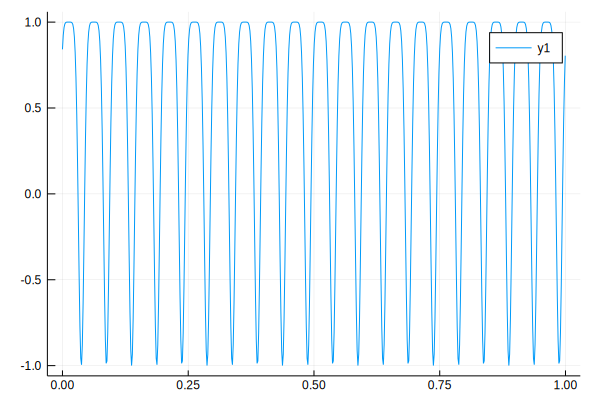

In [7]:
plot(times,signals)

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

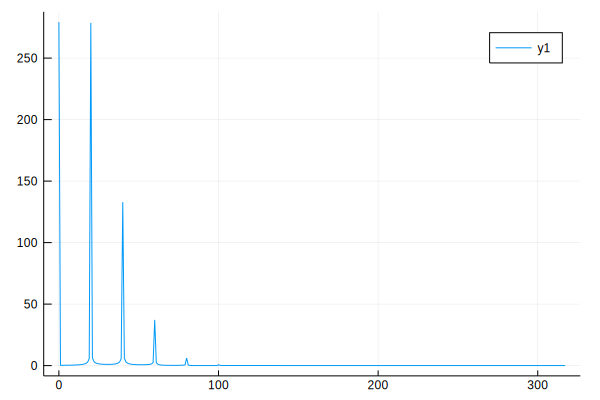

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))